In [79]:
# importing all the modules
import numpy as np
import pandas as pd
import itertools
import tabula
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
gr = nx.DiGraph()
gr.add_nodes_from([('C',{'albal':'cholar dal'})])

In [85]:
gr.nodes['C']

{'albal': 'cholar dal'}

In [ ]:
class GRN_51142:
    
    #class attributes
    description = '''
                    A Gene Regulatory Network of Cyanothece sp. 51142 composed of literature sources. 
                    The current list of sources can be viewed by accessing the sources attribute.
                    The available functions can be viewed by accessing the methods attribute.
                  '''
    sources = '''
                 There are 3 sources at present. They are:
                     1. A model of the circadian clock in the cyanobacterium Cyanothece sp. ATCC 51142 
                         by Nguyen et. al.
                     2. A model of cyclic transcriptomic behavior in the cyanobacterium Cyanothece sp. ATCC 51142 
                         by McDermott et.al.
                     5. Identifying Regulatory Changes to Facilitate Nitrogen Fixation in the Nondiazotroph 
                         Synechocystis sp. PCC 6803 by Mueller et. al.
              '''
    
    methods = '''
                 The following methods can be accessed at present:
                     1. draw: To draw the default network and save it as GRN.png
                     2. drawNamed: To draw the default network with gene annotations and save it as nGRN.png
                     3. drawPruned: To draw a pruned network with some of the more important TF-TF/TF-TG interactions
                                    and save it as pGRN.png
                     4. drawCircadian: To draw the network with the tfs and tgs that have circadian cyclicity and save 
                                     it as cGRN.png. The clock genes/ proteins will also be there. 
                     5. drawDiurnal: To draw the network with the tfs and tgs that are under diurnal rhythm and save it
                                     as dGRN.png.
                     6. drawFiltered: This method supports predefined filter or combination of filters to draw the 
                                     model. The filters can be circadian,diurnal,light,dark,lighttodark,darktolight 
                                     or on sources. They can be implemented by passing c,d,l,da,lda,dal or s 
                                     respectively as attributes.Multiple attibutes must be passed as a list.
              '''
    
    def __init__(self,):
        ## Making the primary database
        GenCyanoDB = pd.read_excel("0 - EAWData/GenSeq.xlsx",index_col=0) # from Welsh et. al paper
        df = tabula.read_pdf("2 - JEMData/c1mb05006k.pdf", pages=['10','11','12','13']) # the identified regulators 
        
        pass

# Import the entire genome of cyanothece 51142

In [35]:
GenCyano = pd.read_excel("0 - EAWData/GenSeq.xlsx",index_col=0).reset_index(drop=True)

In [36]:
GenCyano.head()

,ORF,Function,CommonName
0,cce_0001,hypothetical protein,cce_0001
1,cce_0002,alcohol dehydrogenase,cce_0002
2,cce_0003,hypothetical protein,cce_0003
3,cce_0004,cation efflux system membrane protein,czcA
4,cce_0005,conserved hypothetical protein,cce_0005


# Gathered all the identified regulators in cyanothece 51142
Source: 

2. A model of cyclic transcriptomic behavior in the cyanobacterium Cyanothece sp. ATCC 51142†

Jason E. McDermott,*a Christopher S. Oehmen,a Lee Ann McCue,a Eric Hill,b Daniel M. Choi,a Jana Stöckel,c Michelle Liberton,c Himadri B. Pakrasic and Louis A. Shermand

https://pubs.rsc.org/en/content/articlelanding/2011/MB/c1mb05006k#!divAbstract

In [37]:
import tabula

In [38]:
df = tabula.read_pdf("2 - JEMData/c1mb05006k.pdf", pages=['10','11','12','13'])

In [39]:
df.fillna("unknown",inplace=True)

add a separate column called TF/TG to all the factors in df

In [86]:
df.head()

,ORF,Name,Description,Cyclicity,TFTG
0,cce_0012,unknown,unknown,unknown,{}
1,cce_0115,cce_0115,response regulator,acyclic,{}
2,cce_0145,kaiB4,putative circadian clock protein; KaiB4,acyclic,{}
3,cce_0165,cce_0165,two-component response regulator,acyclic,{}
4,unknown,unknown,"LysR family transcriptional regulatory protein,",unknown,{}


In [89]:
df.loc[df.Name=='sigD']

,ORF,Name,Description,Cyclicity,TFTG
120,cce_3594,sigD,RNA polymerase sigma factor; SigD,circadian,"{'5': {'cce_4666': -0.32967, 'cce_4412': 0.593..."


In [87]:
df.loc[df.Cyclicity=='diurnal']

,ORF,Name,Description,Cyclicity,TFTG
6,cce_0289,cce_0289,two-component response regulator,diurnal,{}
7,cce_0298,rpaA,two-component response regulator; RpaA,diurnal,"{'1': {'cce_0435': 1, 'cce_2642': 1}, '2': {'c..."
8,cce_0310,aslB,putative arylsulfatase regulatory protein; AslB,diurnal,{}
11,cce_0391,cce_0391,regulator NrdR-like domain,diurnal,{}
13,cce_0423,kaiB1,circadian clock protein; KaiB1,diurnal,{'1': {'cce_0145': 1}}
14,cce_0424,kaiA,circadian clock protein; KaiA,diurnal,"{'1': {'cce_2350': 1, 'cce_4751': 1}}"
17,cce_0448,cce_0448,response regulator,diurnal,{}
19,cce_0452,cce_0452,domain,diurnal,{}
21,cce_0461,ntcA,nitrogen-responsive regulatory protein; NtcA,diurnal,{}
25,cce_0601,rpoD,RNA polymerase sigma factor; RpoD,diurnal,"{'5': {'cce_5302': 0.25506, 'cce_4174': 0.1249..."


In [41]:
df['TFTG'] = [dict() for i in range(len(df))] 

Taking in all the common names and functions from the original database just to check that it is correct and because rpoD and sigE were different before 

In [42]:
count = 0
def funcparse(orf):
    if orf in df['ORF'].values:
        global count 
        count += 1
        return pd.Series({'TfBool':True,
                          'Cyclicity':df.loc[df.ORF==orf,'Cyclicity'].values[0]})
    else:
        return pd.Series({'TfBool':False,
                          'Cyclicity':'unknown'})
    
GenCyano = GenCyano.merge(GenCyano.ORF.apply(funcparse),left_index=True,right_index=True)

In [43]:
count

145

In [44]:
GenCyano

,ORF,Function,CommonName,TfBool,Cyclicity
0,cce_0001,hypothetical protein,cce_0001,False,unknown
1,cce_0002,alcohol dehydrogenase,cce_0002,False,unknown
2,cce_0003,hypothetical protein,cce_0003,False,unknown
3,cce_0004,cation efflux system membrane protein,czcA,False,unknown
4,cce_0005,conserved hypothetical protein,cce_0005,False,unknown
...,...,...,...,...,...
5299,cce_5306,hypothetical protein,cce_5306,False,unknown
5300,cce_5307,hypothetical protein,cce_5307,False,unknown
5301,cce_5308,unknown,cce_5308,False,unknown
5302,cce_5309,hypothetical protein,cce_5309,False,unknown


In [45]:
GenCyano.loc[GenCyano.TfBool==True]

,ORF,Function,CommonName,TfBool,Cyclicity
11,cce_0012,two-component response regulator,cce_0012,True,unknown
114,cce_0115,response regulator,cce_0115,True,acyclic
144,cce_0145,putative circadian clock protein,kaiB4,True,acyclic
164,cce_0165,two-component response regulator,cce_0165,True,acyclic
196,cce_0198,LysR family transcriptional regulatory protein...,ntcB,True,circadian
...,...,...,...,...,...
4853,cce_4859,ferric uptake regulation protein,fur4,True,insignificant
5022,cce_5029,putative group 3/4 sigma-70 RNA polymerase sig...,cce_5029,True,acyclic
5081,cce_5088,"transcriptional Regulator, AraC family",cce_5088,True,diurnal
5149,cce_5156,putative transcriptional regulator,cce_5156,True,insignificant


# From the 6 papers, include the interactions  

 The number -1 is inhibitor, +1 is activator and 0 is an unknown interaction.

1. A model of the circadian clock in the cyanobacterium Cyanothece sp. ATCC 51142

Nguyen Xuan Vinh, Madhu Chetty, Ross Coppel, Sandeep Gaudana & Pramod P Wangikar

https://bmcbioinformatics.biomedcentral.com/articles/10.1186/1471-2105-14-S2-S14


In [46]:
# include the clock mechanism
# only included the interaction with valid images or files 
df.loc[df.ORF == 'cce_0424', 'TFTG'].values[0].update({'1': {'cce_2350':1,'cce_4751':1}})
df.loc[df.ORF == 'cce_0423', 'TFTG'].values[0].update({'1':{'cce_0145':1}})
df.loc[df.ORF == 'cce_0435', 'TFTG'].values[0].update({'1':{'cce_0423':1,'cce_1751':1}})
df.loc[df.ORF == 'cce_4716', 'TFTG'].values[0].update({'1':{'cce_0424':1,'cce_0422':1,'cce_3317':1,'cce_0298':1}})
df.loc[df.ORF == 'cce_0298', 'TFTG'].values[0].update({'1':{'cce_0435':1,'cce_2642':1}})
df.loc[df.ORF == 'cce_1751', 'TFTG'].values[0].update({'1':{'cce_4716':1}})

2. A model of cyclic transcriptomic behavior in the cyanobacterium Cyanothece sp. ATCC 51142†

Jason E. McDermott,*a Christopher S. Oehmen,a Lee Ann McCue,a Eric Hill,b Daniel M. Choi,a Jana Stöckel,c Michelle Liberton,c Himadri B. Pakrasic and Louis A. Shermand

https://pubs.rsc.org/en/content/articlelanding/2011/MB/c1mb05006k#!divAbstract

In [47]:
# inferring multiple things from 2 methods, have taken the common ones among them
df.loc[df.ORF == 'cce_0298', 'TFTG'].values[0].update({'2': {'cce_3378':1,'cce_2330':1,'cce_3594':1,'cce_0461':1}})
df.loc[df.ORF == 'cce_1898', 'TFTG'].values[0].update({'2': {'cce_0298':-1,'cce_0461':-1,'cce_0559':1,'cce_0560':1,'cce_0561':1}})
df.loc[df.ORF == 'cce_0644', 'TFTG'].values[0].update({'2': {'cce_0461':1}})
df.loc[df.ORF == 'cce_3298', 'TFTG'].values[0].update({'2': {'cce_0644':1,'cce_0461':1}})
df.loc[df.ORF == 'cce_4141', 'TFTG'].values[0].update({'2': {'cce_3298':1}})
df.loc[df.ORF == 'cce_0678', 'TFTG'].values[0].update({'2': {'cce_3164':1, 'cce_3166':1}})

3. Metabolic Rhythms of the Cyanobacterium Cyanothece sp. ATCC 51142 Correlate with Modeled Dynamics of Circadian Clock

Jan Cˇervený* and Ladislav Nedbal*,†

https://journals.sagepub.com/doi/pdf/10.1177/0748730409338367

4. Global transcriptomic analysis of Cyanothece 51142 reveals robust diurnal oscillation of central metabolic processes

Jana Stöckel, Eric A. Welsh, Michelle Liberton, Rangesh Kunnvakkam, Rajeev Aurora, and Himadri B. Pakrasi

https://www.pnas.org/content/105/16/6156

5. Identifying Regulatory Changes to Facilitate Nitrogen Fixation in the Nondiazotroph Synechocystis sp. PCC 6803

Thomas J. Mueller†Eric A. Welsh‡Himadri B. Pakrasi§∥Costas D. Maranas*†

https://pubs.acs.org/doi/full/10.1021/acssynbio.

In [48]:
# import TJM data file made before

tjmdf = pd.read_excel("5 - TJMData/interTJM.xlsx",index_col=0)

In [49]:
alltfs = df['ORF']
a = set(alltfs)
tjmtfs = tjmdf['TF ORF']
b = set(tjmtfs)
b-a

{'cce_0556', 'cce_2943', 'cce_4219'}

Found 1 ferrodoxin and 2 kinases. Will eliminate them. 

In [50]:
for tforf in b-(b-a):
    #find the interaction
    tglist = list(tjmdf.loc[tjmdf.loc[:,'TF ORF']==tforf]['TG ORF'])
    wlist  = list(tjmdf.loc[tjmdf.loc[:,'TF ORF']==tforf]['cjval'])
    innerdict  = {tg:w for tg,w in zip(tglist,wlist)}
    df.loc[df.ORF == tforf, 'TFTG'].values[0].update({'5': innerdict})

# Visualize the network 

In [51]:
# select those ORFs without an empty dictionary

interdf = df.loc[df.TFTG!=dict()]

In [52]:
interdf.head()

,ORF,Name,Description,Cyclicity,TFTG
7,cce_0298,rpaA,two-component response regulator; RpaA,diurnal,"{'1': {'cce_0435': 1, 'cce_2642': 1}, '2': {'c..."
13,cce_0423,kaiB1,circadian clock protein; KaiB1,diurnal,{'1': {'cce_0145': 1}}
14,cce_0424,kaiA,circadian clock protein; KaiA,diurnal,"{'1': {'cce_2350': 1, 'cce_4751': 1}}"
15,cce_0435,kaiB3,circadian clock protein; KaiB3,circadian,"{'1': {'cce_0423': 1, 'cce_1751': 1}}"
25,cce_0601,rpoD,RNA polymerase sigma factor; RpoD,diurnal,"{'5': {'cce_5302': 0.25506, 'cce_4174': 0.1249..."


In [25]:
def tftgfunc(row):
    newdict = {}
    for key,values in row.items():
        newdict[key] = {interdf.loc[interdf['ORF']==k,'CommonName'].values[0] if k in interdf['ORF'].values else k:v for k,v in values.items()}
    return newdict

interdf['TFTGn'] = interdf.TFTG.apply(tftgfunc)

C:\Users\Deepro\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [26]:
interdf

,ORF,Name,Description,Cyclicity,TFTG,CommonName,Function,TFTGn
7,cce_0298,rpaA,two-component response regulator; RpaA,diurnal,"{'1': {'cce_0435': 1, 'cce_2642': 1}, '2': {'c...",rpaA,two-component response regulator,"{'1': {'kaiB3': 1, 'cce_2642': 1}, '2': {'cce_..."
13,cce_0423,kaiB1,circadian clock protein; KaiB1,diurnal,{'1': {'cce_0145': 1}},kaiB1,circadian clock protein,{'1': {'cce_0145': 1}}
14,cce_0424,kaiA,circadian clock protein; KaiA,diurnal,"{'1': {'cce_2350': 1, 'cce_4751': 1}}",kaiA,circadian clock protein,"{'1': {'cce_2350': 1, 'cce_4751': 1}}"
15,cce_0435,kaiB3,circadian clock protein; KaiB3,circadian,"{'1': {'cce_0423': 1, 'cce_1751': 1}}",kaiB3,circadian clock protein,"{'1': {'kaiB1': 1, 'sasA': 1}}"
25,cce_0601,rpoD,RNA polymerase sigma factor; RpoD,diurnal,"{'5': {'cce_5302': 0.25506, 'cce_4174': 0.1249...",sigE,group 2 sigma-70 RNA polymerase sigma factor E,"{'5': {'cce_5302': 0.25506, 'cce_4174': 0.1249..."
26,cce_0644,sigB,RNA polymerase sigma factor; SigB,diurnal,{'2': {'cce_0461': 1}},sigB,group 2 sigma-70 RNA polymerase sigma factor B,{'2': {'cce_0461': 1}}
29,cce_0678,cce_0678,two-component response regulator,diurnal,"{'2': {'cce_3164': 1, 'cce_3166': 1}}",cce_0678,two-component response regulator,"{'2': {'cce_3164': 1, 'cce_3166': 1}}"
53,cce_1520,cce_1520,two-component response regulator,diurnal,"{'5': {'cce_4358': 0.33167, 'cce_3337': 0.2885...",cce_1520,two-component response regulator,"{'5': {'cce_4358': 0.33167, 'cce_3337': 0.2885..."
62,cce_1751,sasA,adaptive-response sensory histidine kinase; SasA,diurnal,{'1': {'cce_4716': 1}},sasA,adaptive-response sensory histidine kinase,{'1': {'kaiC2': 1}}
75,cce_1898,patB,probable transcriptional regulator; PatB,circadian,"{'2': {'cce_0298': -1, 'cce_0461': -1, 'cce_05...",patB,probable transcriptional regulator,"{'2': {'rpaA': -1, 'cce_0461': -1, 'cce_0559':..."


In [27]:
interdf.loc[interdf['ORF']=='cce_0298','TFTG']

7    {'1': {'cce_0435': 1, 'cce_2642': 1}, '2': {'c...
Name: TFTG, dtype: object

In [53]:
# collect all set of names that are either tf or tg
allnodes = set()
for tf in interdf.loc[:,'ORF']:
    allnodes.add(tf)
    for source,interdict in interdf.loc[interdf['ORF']==tf,'TFTG'].values[0].items():
        allnodes.update(interdict.keys())

In [54]:
namednodes = {i:GenCyano.loc[GenCyano.ORF==i]['CommonName'].values[0] for i in allnodes}

In [55]:
# collect all set of names that are either tf or tg
allnamednodes = set(namednodes.values())

In [56]:
alledges = list()

for source in interdf.loc[:,'ORF']:
    for litsource,interdict in interdf.loc[interdf['ORF']==source,'TFTG'].values[0].items():
        #print(source,interdict)
        wdict = [{'weight':activ,'source':litsource} for activ in interdict.values()]
        #print(list(zip(itertools.cycle([source]),interdict.keys(),wdict)))
        alledges.extend(tuple(zip(itertools.cycle([source]),interdict.keys(),wdict)))

In [57]:
allnamededges = [tuple([namednodes[i],namednodes[j],w]) for i,j,w in alledges]

In [58]:
len(alledges),len(allnamededges)

(169, 169)

In [59]:
import networkx as nx
G=nx.DiGraph()
G.add_nodes_from(list(allnodes))
G.add_edges_from(alledges)

In [72]:
gr = nx.DiGraph()
attrdict =  {'Func':'Kichuina','Dhur':'bara'}
gr.add_nodes_from([('A',attrdict)])

In [73]:
gr.nodes(data=True)

NodeDataView({'A': {'Func': 'Kichuina', 'Dhur': 'bara'}})

In [78]:
GenCyano.loc[GenCyano.ORF=='cce_0001']['Function'].values[0]

'hypothetical protein'

In [64]:
G.nodes(data=True)

NodeDataView({'cce_3639': {}, 'cce_1155': {}, 'cce_0298': {}, 'cce_1223': {}, 'cce_2072': {}, 'cce_3424': {}, 'cce_0886': {}, 'cce_3518': {}, 'cce_3166': {}, 'cce_1313': {}, 'cce_3527': {}, 'cce_5288': {}, 'cce_3317': {}, 'cce_3522': {}, 'cce_3477': {}, 'cce_2071': {}, 'cce_1019': {}, 'cce_4412': {}, 'cce_0720': {}, 'cce_1891': {}, 'cce_3972': {}, 'cce_3202': {}, 'cce_4174': {}, 'cce_0559': {}, 'cce_3517': {}, 'cce_3834': {}, 'cce_4716': {}, 'cce_3633': {}, 'cce_3378': {}, 'cce_0561': {}, 'cce_3179': {}, 'cce_2639': {}, 'cce_0403': {}, 'cce_4475': {}, 'cce_5302': {}, 'cce_3950': {}, 'cce_3230': {}, 'cce_1112': {}, 'cce_3627': {}, 'cce_0601': {}, 'cce_0019': {}, 'cce_2967': {}, 'cce_3269': {}, 'cce_1946': {}, 'cce_2295': {}, 'cce_2514': {}, 'cce_1182': {}, 'cce_0997': {}, 'cce_0303': {}, 'cce_3870': {}, 'cce_0644': {}, 'cce_3298': {}, 'cce_4666': {}, 'cce_2708': {}, 'cce_4580': {}, 'cce_4664': {}, 'cce_3594': {}, 'cce_0791': {}, 'cce_4751': {}, 'cce_3964': {}, 'cce_0548': {}, 'cce_0435'

In [56]:
Gn=nx.DiGraph()
Gn.add_nodes_from(list(allnamednodes))
Gn.add_edges_from(allnamededges)

In [57]:
try:
    import pygraphviz
    from networkx.drawing.nx_agraph import graphviz_layout
except ImportError:
    try:
        import pydot
        from networkx.drawing.nx_pydot import graphviz_layout
    except ImportError:
        raise ImportError("This example needs Graphviz and either "
                          "PyGraphviz or pydot")

In [34]:
G.nodes

NameError: name 'G' is not defined

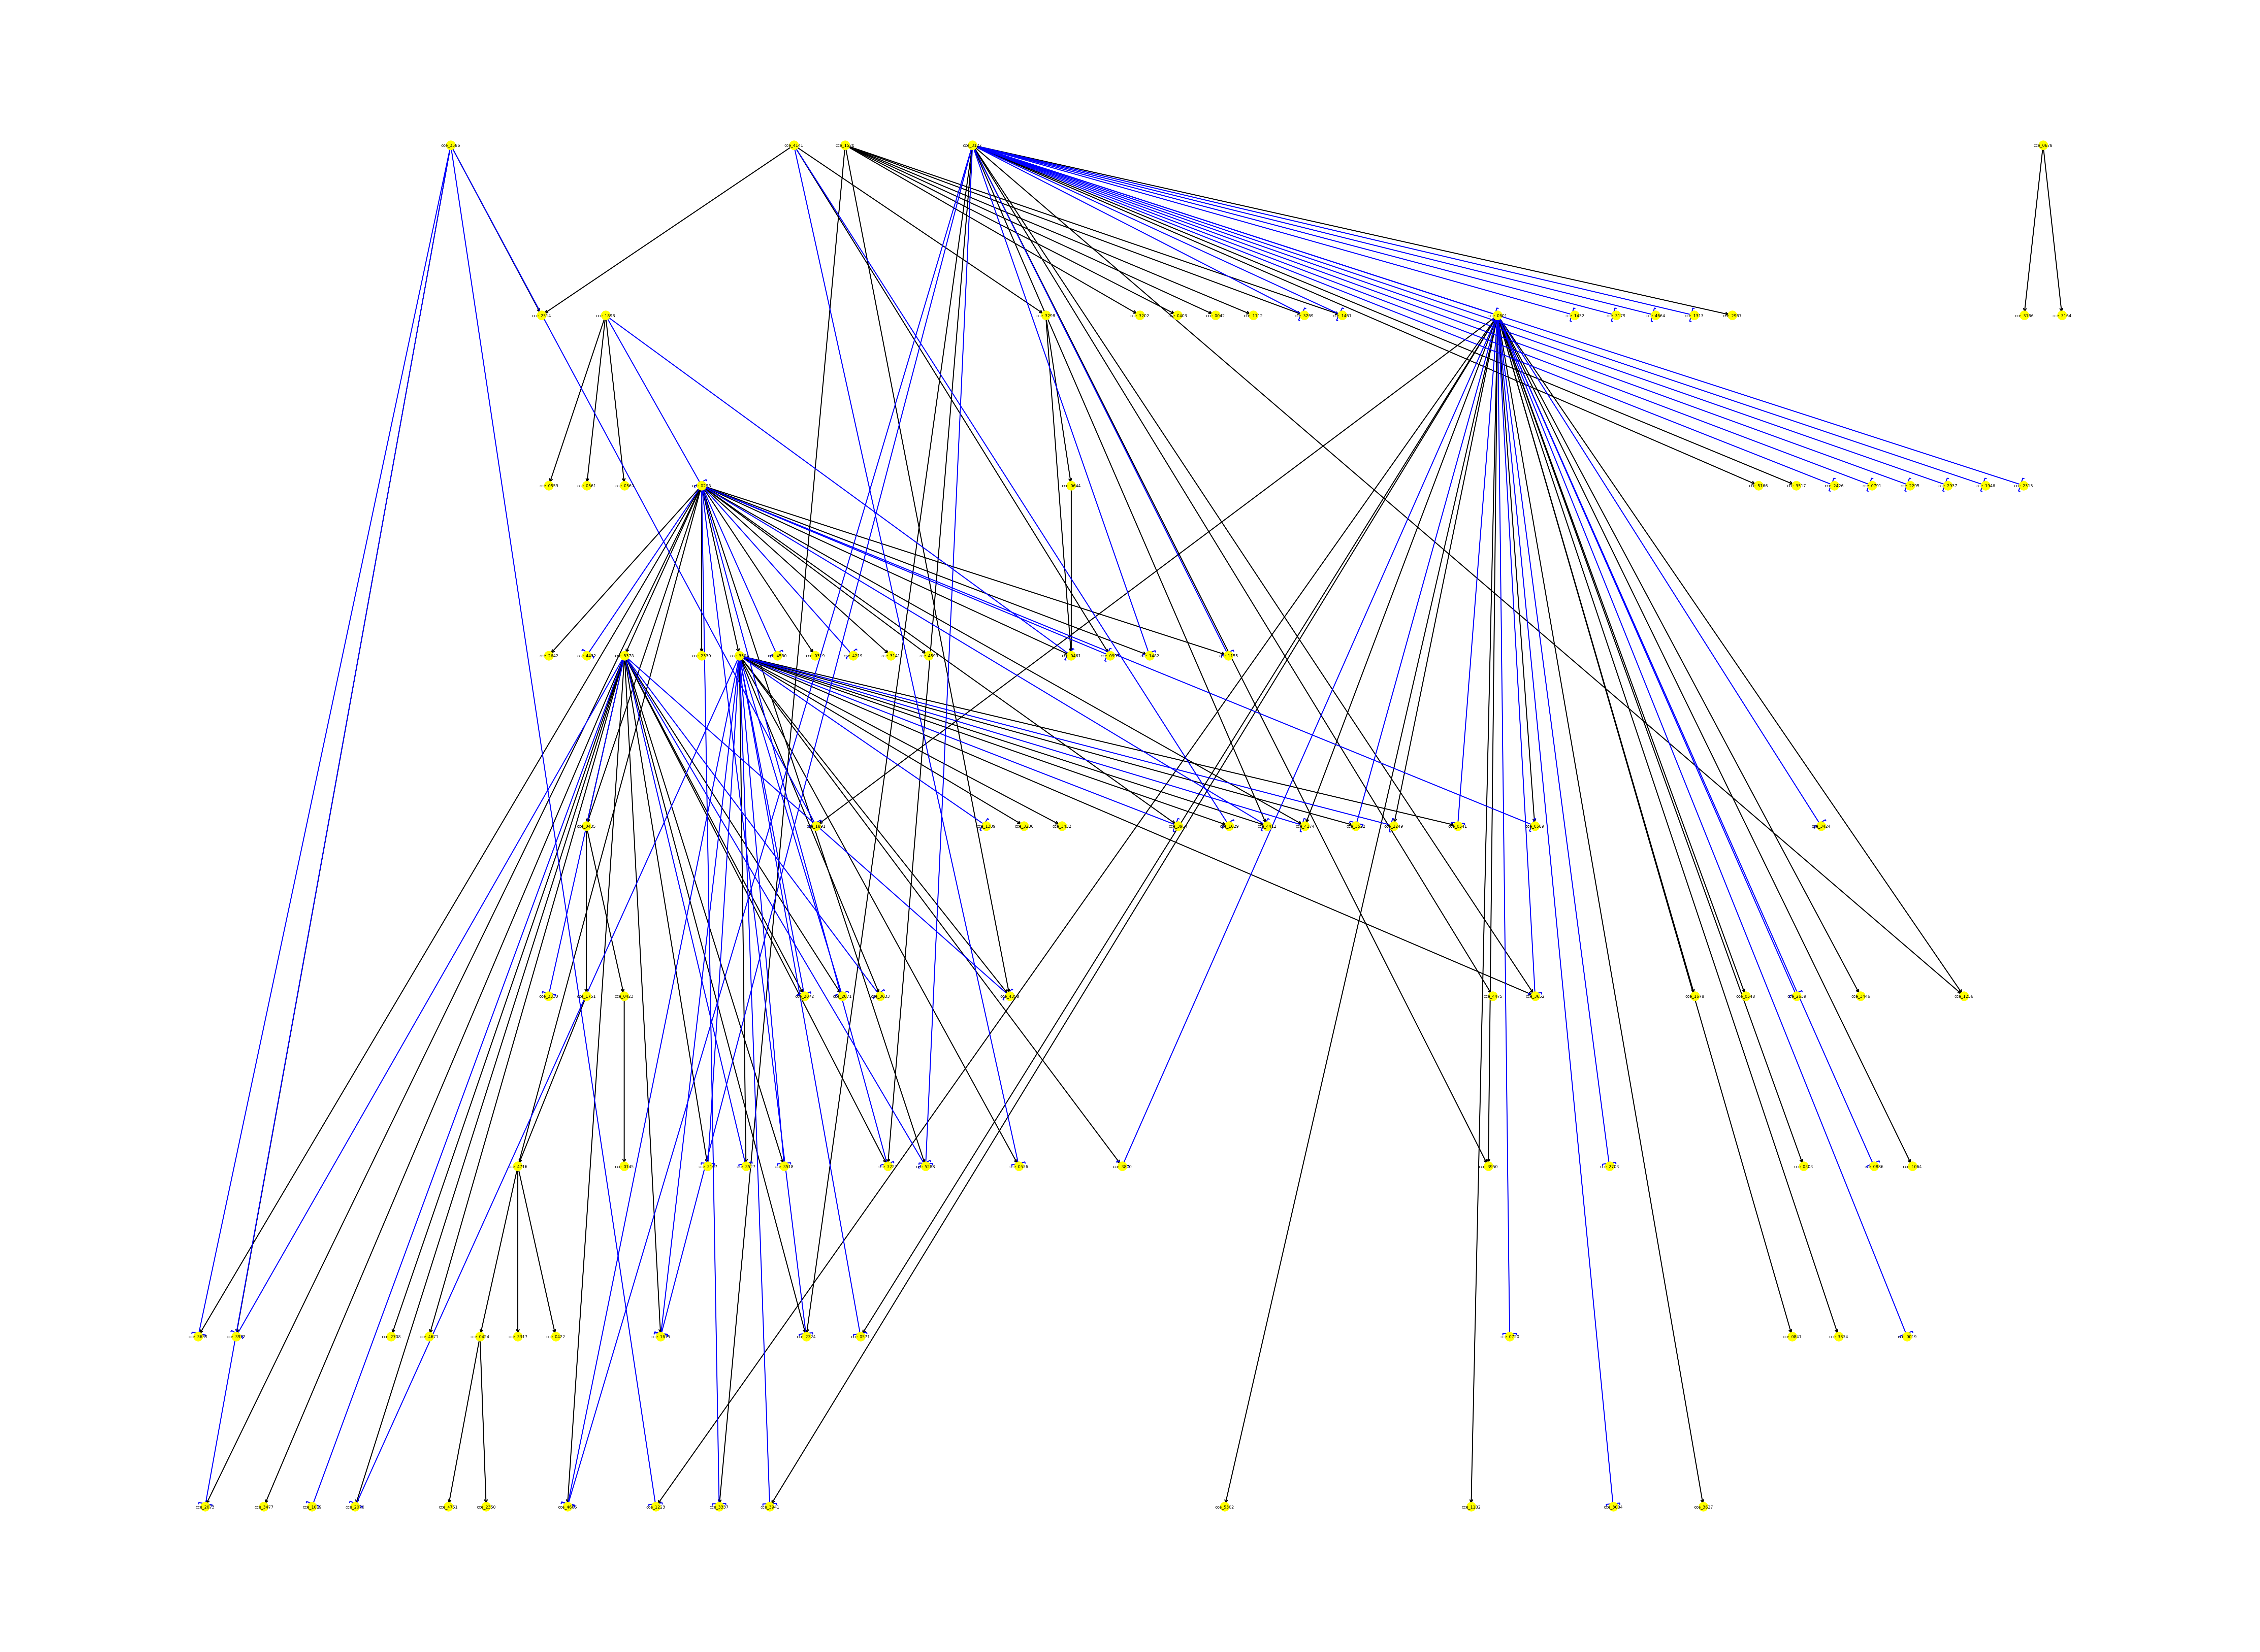

In [58]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(120,90))

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0]

#pos = nx.layout.spring_layout(G)
pos = graphviz_layout(G, prog='dot')

nx.draw_networkx_nodes(G, pos, with_labels=True, node_size=750, node_color='yellow')

nx.draw_networkx_edges(G, pos, edgelist=elarge, width=3, arrows = True, arrowsize = 20,arrowstyle= '->',min_source_margin=5,min_target_margin=5)
nx.draw_networkx_edges(G, pos, edgelist=esmall, width=3, arrows = True, edge_color='b', arrowsize = 20,
                       arrowstyle= '-[',style = 'dotted',min_source_margin=10,min_target_margin=11)

nx.draw_networkx_labels(G, pos, font_size=12)

ax = plt.gca()
ax.set_axis_off()
plt.savefig('GRN.png')
plt.show()